# Mathematical Underpinnings - Lab 4

In [1]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import pandas as pd

## Task 1

### a)

#### bp 1)

In [2]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

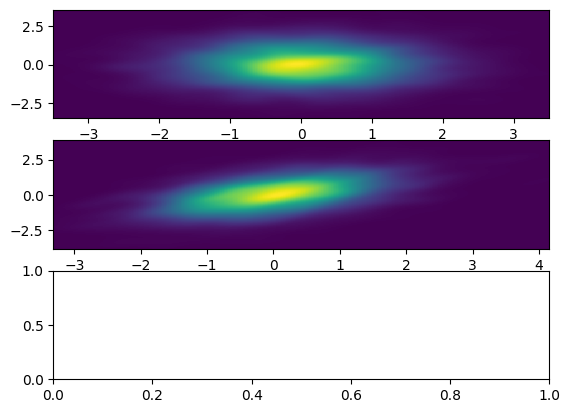

In [3]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
#xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
#axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) & bp 3)

In [4]:
from sklearn.metrics import mutual_info_score
ans = []
N = 100
n = 1000
sigmas = np.linspace(0, 1, 21)
for sigma in sigmas:
    mi, perason = [], []
    for i in range(N):
        data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, sigma], [sigma, 1]]), n)
        x1 = pd.cut(data_2d[:,0], bins=10, labels=False)
        x2 = pd.cut(data_2d[:,1], bins=10, labels=False)
        mi.append(mutual_info_score(x1, x2))
        perason.append(pearsonr(data_2d[:,0], data_2d[:,1])[0])
    ans.append([sigma, np.mean(mi), "mutual_info_score"])
    ans.append([sigma, np.mean(perason), "pearsonr"])

In [5]:
ans = pd.DataFrame(ans, columns=['sigma', 'score', 'method'])
ans.head()

,sigma,score,method
0,0.00,0.037649,mutual_info_score
1,0.00,0.000186,pearsonr
2,0.05,0.039021,mutual_info_score
3,0.05,0.047452,pearsonr
4,0.10,0.042539,mutual_info_score


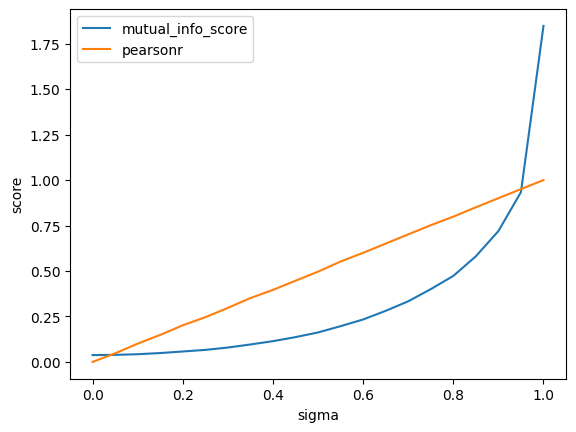

In [6]:
plt.plot(ans[ans.method == 'mutual_info_score'].sigma, ans[ans.method == 'mutual_info_score'].score, label='mutual_info_score')
plt.plot(ans[ans.method == 'pearsonr'].sigma, ans[ans.method == 'pearsonr'].score, label='pearsonr')
plt.legend()
plt.xlabel('sigma')
plt.ylabel('score')
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

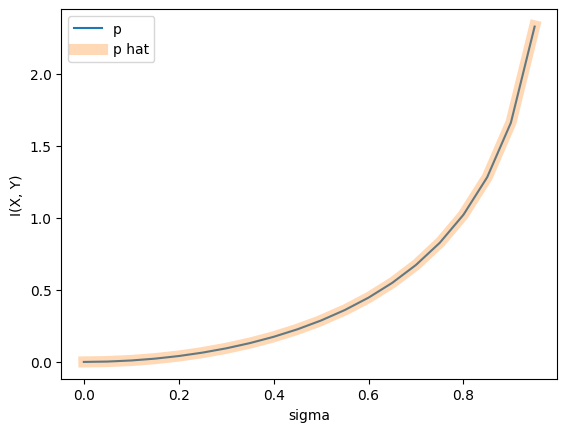

In [15]:
ans = ans[(ans.score < 0.99) & (ans.sigma < 0.99)]
plt.plot(ans[ans.method == 'pearsonr'].sigma, -np.log(1-ans[ans.method == 'pearsonr'].sigma**2), label='p')
plt.plot(ans[ans.method == 'pearsonr'].score, -np.log(1-ans[ans.method == 'pearsonr'].score**2), label='p hat', linewidth=8, alpha=0.3)
plt.legend()
plt.ylabel('I(X, Y)')
plt.xlabel('sigma')
plt.show()

### b)

#### bp 1)

In [11]:
# again: this is too time consuming so here is an answer

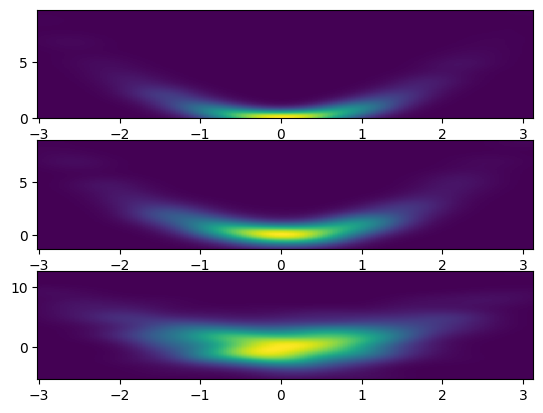

In [33]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [36]:
ans = []
N = 100
n = 1000
sigmas = np.linspace(0, 1, 21)
for sigma in sigmas:
    mi, perason = [], []
    for i in range(N):
        x = np.random.normal(0, 1, n)
        y = x**2 + np.random.normal(0, sigma, n)
        perason.append(pearsonr(x, y)[0])

        x1 = pd.cut(x, bins=10, labels=False)
        x2 = pd.cut(y, bins=10, labels=False)
        mi.append(mutual_info_score(x1, x2))

    ans.append([sigma, np.mean(mi), "mutual_info_score"])
    ans.append([sigma, np.mean(perason), "pearsonr"])

In [37]:
ans = pd.DataFrame(ans, columns=['sigma', 'score', 'method'])
ans.head()

,sigma,score,method
0,0.00,0.658769,mutual_info_score
1,0.00,-0.002584,pearsonr
2,0.05,0.688540,mutual_info_score
3,0.05,0.003227,pearsonr
4,0.10,0.716669,mutual_info_score


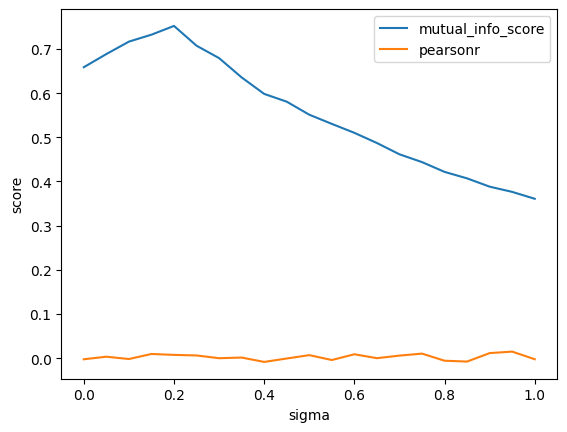

In [38]:
plt.plot(ans[ans.method == 'mutual_info_score'].sigma, ans[ans.method == 'mutual_info_score'].score, label='mutual_info_score')
plt.plot(ans[ans.method == 'pearsonr'].sigma, ans[ans.method == 'pearsonr'].score, label='pearsonr')
plt.legend()
plt.xlabel('sigma')
plt.ylabel('score')
plt.show()

## Task 2

### a)

In [39]:
def indep_test_asymptotic(X, Y, stats):
    X = pd.cut(X, bins=10, labels=False)
    Y = pd.cut(Y, bins=10, labels=False)
    
    if stats == "mi":
        stat_value = 2*len(X)*mutual_info_score(X, Y)
    if stats == "chi2":
        test_res = (chi2_contingency(pd.crosstab(X, Y)))
        stat_value = test_res.statistic

    df = (len(np.unique(X)) - 1)*(len(np.unique(Y)) - 1)

    p_value = 1 - chi2.cdf(stat_value, df=df)

    return stat_value, p_value

### b)

In [47]:
def permutation_test(X, Y, B):
    x1 = pd.cut(X, bins=10, labels=False)
    x2 = pd.cut(Y, bins=10, labels=False)
    MI = mutual_info_score(x1, x2)
    
    cnt = 0
    for i in range(B):
        X_b = X[np.random.permutation(len(X))]
        x1 = pd.cut(X_b, bins=10, labels=False)
        MI_b = mutual_info_score(x1, x2)
        if MI_b >= MI:
            cnt += 1
    
    return (1 + cnt) / (1 + B)

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [ ]:
# independent r.v. - we expect that our tests don't reject the null hypothesis

In [45]:
n = 1000
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n).T
X, Y = data_2d[0], data_2d[1]

In [48]:
print('MI test:', indep_test_asymptotic(X, Y, 'mi'))
print('Chi2 test:', indep_test_asymptotic(X, Y, 'chi2'))
print('Permutation test:', permutation_test(X, Y, 100))

MI test: (74.93146660163357, 0.6687637898140125)
Chi2 test: (85.29252558338574, 0.3506171205202113)
Permutation test: 0.4158415841584158


**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [50]:
n = 1000
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n).T
X, Y = data_2d[0], data_2d[1]

In [51]:
print('MI test:', indep_test_asymptotic(X, Y, 'mi'))
print('Chi2 test:', indep_test_asymptotic(X, Y, 'chi2'))
print('Permutation test:', permutation_test(X, Y, 100))

MI test: (334.63123135886116, 0.0)
Chi2 test: (525.0104026538703, 0.0)
Permutation test: 0.009900990099009901


In [52]:
n = 1000
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n).T
X, Y = data_2d[0], data_2d[1]

In [53]:
print('MI test:', indep_test_asymptotic(X, Y, 'mi'))
print('Chi2 test:', indep_test_asymptotic(X, Y, 'chi2'))
print('Permutation test:', permutation_test(X, Y, 100))

MI test: (3802.3147307340914, 0.0)
Chi2 test: (9000.000000000002, 0.0)
Permutation test: 0.009900990099009901
